In [1]:
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Valid data

In [3]:
data = pd.read_csv(parent_dir + '/method/SER_FIQ/scores/valid/adaface_LFW.csv')
data["img_path"] = data["img_path"].str.replace("/", "\\", regex=False)

In [4]:
data


,img_path,output_score
0,mgr_data\LFW\William_Macy\William_Macy_0001.jpg,0.814499
1,mgr_data\LFW\Mike_Myers\Mike_Myers_0001.jpg,0.940051
2,mgr_data\LFW\John_Allen_Muhammad\John_Allen_Mu...,0.881297
3,mgr_data\LFW\John_Snow\John_Snow_0013.jpg,0.901022
4,mgr_data\LFW\Colin_Powell\Colin_Powell_0202.jpg,0.839098
...,...,...
5980,mgr_data\LFW\Richard_Gephardt\Richard_Gephardt...,0.812439
5981,mgr_data\LFW\Julie_Gerberding\Julie_Gerberding...,0.609758
5982,mgr_data\LFW\Tommy_Thompson\Tommy_Thompson_000...,0.721218
5983,mgr_data\LFW\George_W_Bush\George_W_Bush_0164.jpg,0.780904


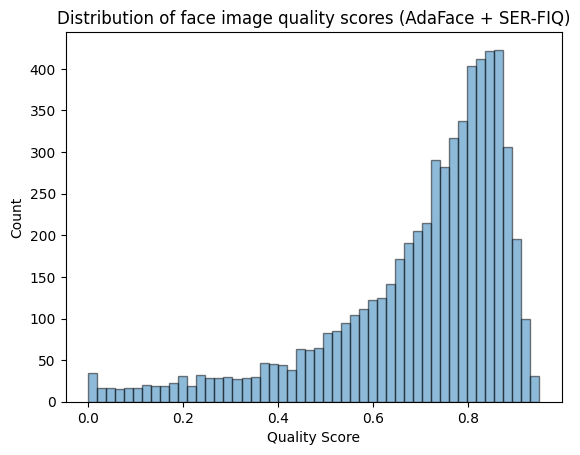

In [5]:
plt.hist(data['output_score'], bins=50, edgecolor='black', alpha=0.5)
plt.title("Distribution of face image quality scores (AdaFace + SER-FIQ)")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

In [6]:
under_5 = data[data['output_score'] < 0.05].sample(1)
bet_5_15 = data[(data['output_score'] >= 0.05) & (data['output_score'] < 0.15)].sample(1)
bet_15_30 = data[(data['output_score'] >= 0.15) & (data['output_score'] < 0.30)].sample(1)
bet_30_45 = data[(data['output_score'] >= 0.30) & (data['output_score'] < 0.45)].sample(1)
bet_45_60 = data[(data['output_score'] >= 0.45) & (data['output_score'] < 0.60)].sample(1)
bet_60_75 = data[(data['output_score'] >= 0.60) & (data['output_score'] < 0.9)].sample(1)

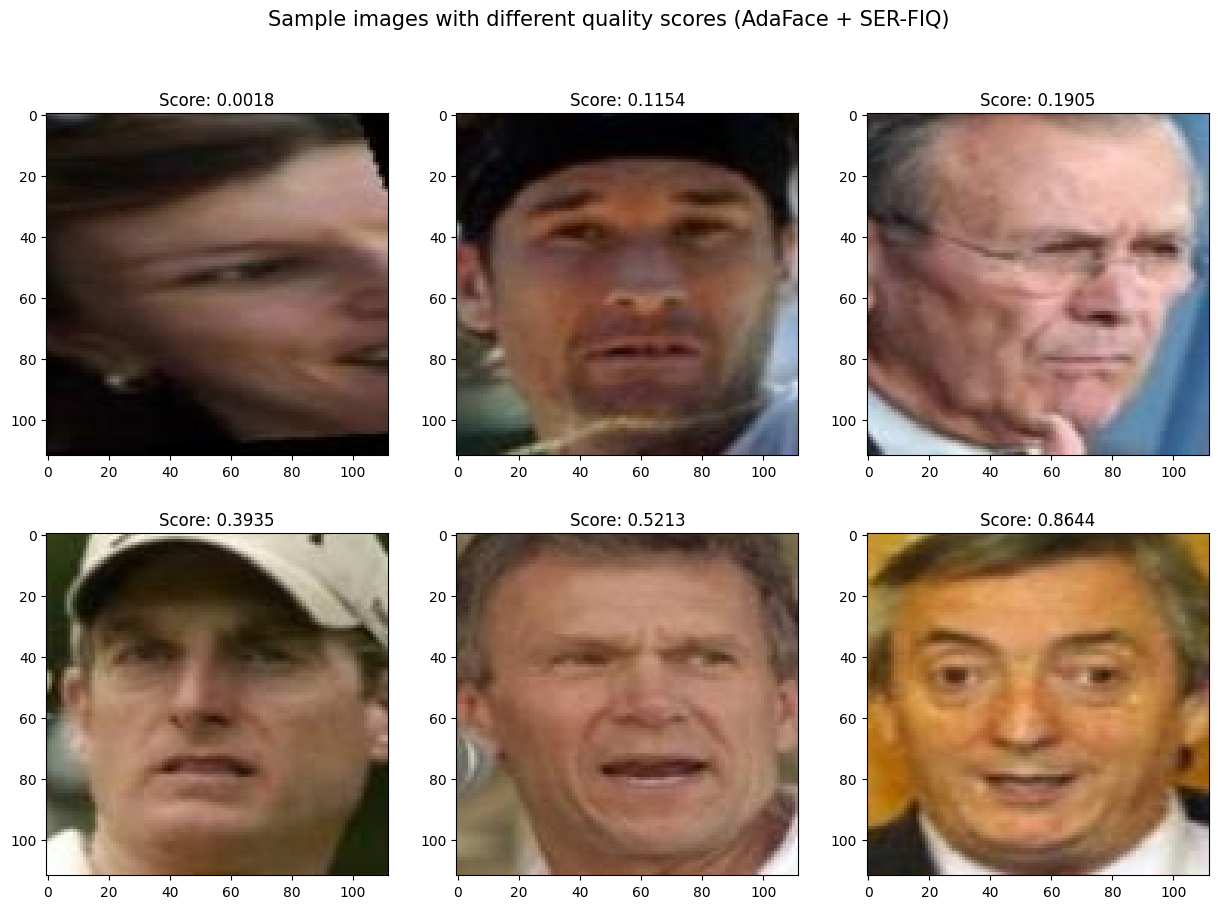

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
img = plt.imread(parent_dir + "/" + under_5['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(under_5['output_score'].values[0], 4)))

plt.subplot(2, 3, 2)
img = plt.imread(parent_dir + "/" + bet_5_15['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_5_15['output_score'].values[0], 4)))

plt.subplot(2, 3, 3)
img = plt.imread(parent_dir + "/" + (bet_15_30['img_path'].values[0]))
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_15_30['output_score'].values[0], 4)))

plt.subplot(2, 3, 4)
img = plt.imread(parent_dir + "/" + bet_30_45['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_30_45['output_score'].values[0], 4)))

plt.subplot(2, 3, 5)
img = plt.imread(parent_dir + "/" + bet_45_60['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_45_60['output_score'].values[0], 4)))

plt.subplot(2, 3, 6)
img = plt.imread(parent_dir + "/" + bet_60_75['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_60_75['output_score'].values[0], 4)))

plt.suptitle('Sample images with different quality scores (AdaFace + SER-FIQ)', fontsize=15)
plt.show()



In [8]:
thresholds = np.linspace(0.1, 0.85, 66)

In [9]:
valid_emb = pd.read_csv(parent_dir + '/mgr_data/embeddings/adaface_LFW_embeddings.csv')
valid_emb["path"] = valid_emb["path"].str.replace("/", "\\", regex=False)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from face_models.model import load_model
import ast

d:\mgr\wvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\mgr\wvenv\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.6 (you have 1.4.16). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
d:\mgr\wvenv\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [11]:
model = load_model("adaface")

d:\mgr\face_models\models\AdaFace\inference.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  statedict = torch.load(adaface_models[architecture])['state_dict']


In [12]:
fars = []
frrs = []
accs = []
f1s = []
precs = []
recs = []


In [13]:
from tqdm import tqdm

In [14]:
valid_emb

,embedding,label,path
0,"[0.009997721761465073, 0.026522330939769745, 0...",411,mgr_data\LFW\William_Macy\William_Macy_0001.jpg
1,"[0.049328647553920746, -0.040568508207798004, ...",274,mgr_data\LFW\Mike_Myers\Mike_Myers_0001.jpg
2,"[-0.044635988771915436, 0.05044694244861603, -...",185,mgr_data\LFW\John_Allen_Muhammad\John_Allen_Mu...
3,"[-0.07373926043510437, -0.034276507794857025, ...",195,mgr_data\LFW\John_Snow\John_Snow_0013.jpg
4,"[-0.032401129603385925, -0.0071623967960476875...",79,mgr_data\LFW\Colin_Powell\Colin_Powell_0202.jpg
...,...,...,...
5980,"[0.04737282171845436, -0.05571756139397621, 0....",325,mgr_data\LFW\Richard_Gephardt\Richard_Gephardt...
5981,"[-0.04054786264896393, -0.033947914838790894, ...",208,mgr_data\LFW\Julie_Gerberding\Julie_Gerberding...
5982,"[-0.026741210371255875, 0.0723222866654396, 0....",390,mgr_data\LFW\Tommy_Thompson\Tommy_Thompson_000...
5983,"[0.03142119199037552, 0.06697788089513779, 0.0...",120,mgr_data\LFW\George_W_Bush\George_W_Bush_0164.jpg


In [15]:
num_data = len(data)
data_percent = []

In [16]:
for t in tqdm(thresholds):
    choices = data[data['output_score'] > t]
    data_percent.append(1- (len(choices) / num_data))
    embeddings = valid_emb[valid_emb['path'].isin(choices['img_path'])]
    labels = embeddings['label'].values
    emb = embeddings['embedding'].values
    emb = np.array([np.array(ast.literal_eval(e)) for e in emb])
    
    score = model.compute_similarities(emb, emb)

    labels_matrix = np.equal(labels[:, None], labels)
    upper_triangle_indices = np.triu_indices_from(score, k=1)
    class_labels = labels_matrix[upper_triangle_indices]
    scores = score[upper_triangle_indices]

    ground_truth = class_labels
    decisions = scores > 0.137111
    acc = accuracy_score(ground_truth, decisions)
    f1 = f1_score(ground_truth, decisions)
    prec = precision_score(ground_truth, decisions)
    rec = recall_score(ground_truth, decisions)
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)

100%|██████████| 66/66 [16:05<00:00, 14.63s/it]


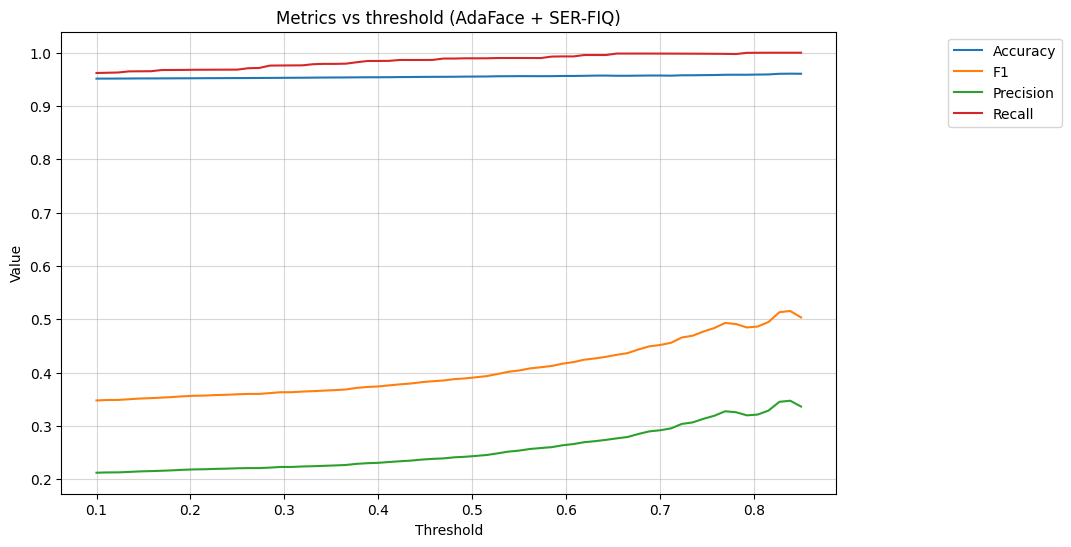

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, precs, label='Precision')
plt.plot(thresholds, recs, label='Recall')
# plt.axvline(x=0.24, color='r', linestyle='--', label='Threshold = 0.24')
plt.title('Metrics vs threshold (AdaFace + SER-FIQ)')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(alpha=0.5)

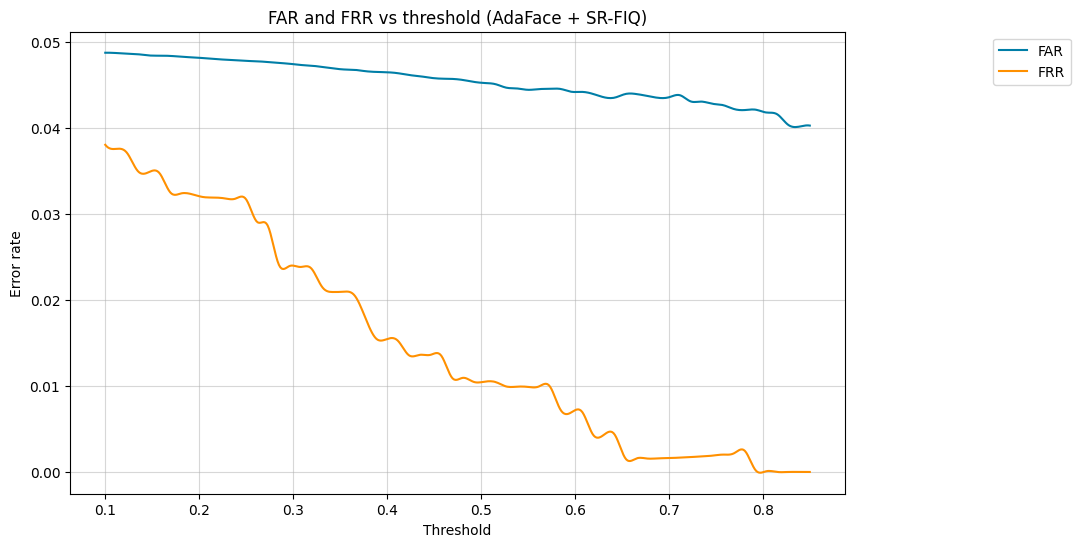

In [18]:
from scipy.interpolate import make_interp_spline
new_fars = make_interp_spline(thresholds, fars)
X_ = np.linspace(np.min(thresholds), np.max(thresholds), 500)
Y_ = new_fars(X_)
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, label='FAR', color='#007EA7')

new_frrs = make_interp_spline(thresholds, frrs)
Y_ = new_frrs(X_)
plt.plot(X_, Y_, label='FRR', color= '#FF9000')
plt.title('FAR and FRR vs threshold (AdaFace + SR-FIQ)')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# plt.figure(figsize=(10, 6))
# plt.plot(thresholds, fars, label='FAR')
# plt.plot(thresholds, frrs, label='FRR')
# plt.title('adaface - FAR and FRR vs threshold')
# plt.xlabel('Threshold')
# plt.ylabel('Error rate')
# plt.grid(alpha=0.5)
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

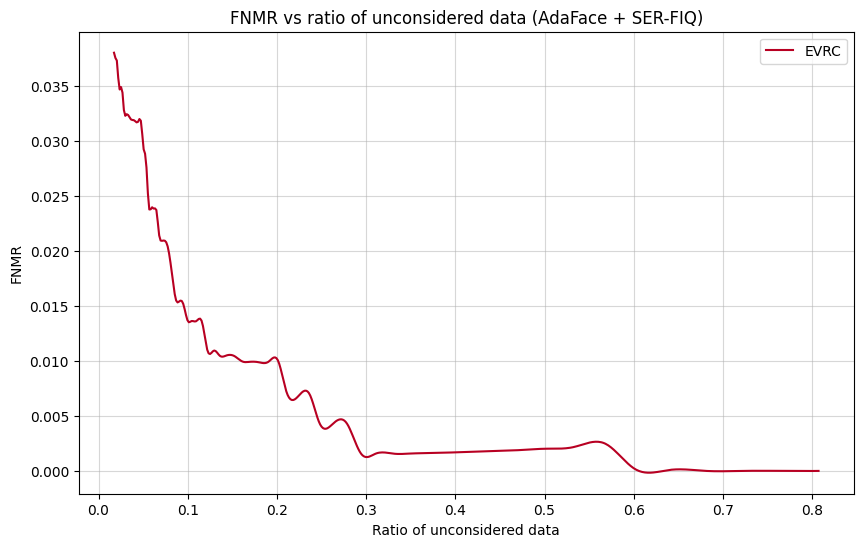

In [19]:
new_evrc = make_interp_spline(data_percent, frrs)
X_ = np.linspace(np.min(data_percent), np.max(data_percent), 500)
Y_ = new_evrc(X_)
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, color ='#B80022', label='EVRC')
plt.title('FNMR vs ratio of unconsidered data (AdaFace + SER-FIQ)')
plt.xlabel('Ratio of unconsidered data')
plt.ylabel('FNMR')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.5)


In [20]:
from sklearn.metrics import auc
auc_value = auc(data_percent, frrs)
print(auc_value)

0.004256663508975359


In [21]:
import pickle
evrc = np.stack((X_, Y_))

with open(parent_dir + '/notebooks/quality/connected/serfiq_adaface_evrc.pkl', 'wb') as f:
    pickle.dump(evrc, f)


# Test data

In [22]:
test_emb = pd.read_csv(parent_dir + '/mgr_data/embeddings/adaface_IJBC_cut_embeddings.csv')
test_data = pd.read_csv(parent_dir + '/method/SER_FIQ/scores/test/adaface_IJBC.csv')
test_data["img_path"] = test_data["img_path"].str.replace("/", "\\", regex=False)
test_emb["path"] = test_emb["path"].str.replace("/", "\\", regex=False)

In [23]:
choices = test_data[test_data['output_score'] > 0.3]
embeddings = test_emb[test_emb['path'].isin(choices['img_path'])]
labels = embeddings['label'].values
emb = embeddings['embedding'].values
emb = np.array([np.array(ast.literal_eval(e)) for e in emb])

score = model.compute_similarities(emb, emb)

labels_matrix = np.equal(labels[:, None], labels)
upper_triangle_indices = np.triu_indices_from(score, k=1)
class_labels = labels_matrix[upper_triangle_indices]
scores = score[upper_triangle_indices]

ground_truth = class_labels
decisions = scores > 0.137111
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)

In [24]:
thresholds = np.linspace(-0.3, 1, 131)

In [25]:
fars = []
frrs = []

In [26]:
choices = test_data[test_data['output_score'] > 0.3]
for t in thresholds:
    embeddings = test_emb[test_emb['path'].isin(choices['img_path'])]
    labels = embeddings['label'].values
    emb = embeddings['embedding'].values
    emb = np.array([np.array(ast.literal_eval(e)) for e in emb])

    score = model.compute_similarities(emb, emb)

    labels_matrix = np.equal(labels[:, None], labels)
    upper_triangle_indices = np.triu_indices_from(score, k=1)
    class_labels = labels_matrix[upper_triangle_indices]
    scores = score[upper_triangle_indices]

    ground_truth = class_labels
    decisions = scores > t
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    far = FP / (FP + TN)
    frr = FN / (FN + TP)
    fars.append(far)
    frrs.append(FRR)

In [27]:
from utils.utils import calculate_eer
thres, eer = calculate_eer(thresholds, fars, frrs)

In [28]:
results_json = {}
results_json['valid'] = {}
results_json['test'] = {}
results_json['valid']['auc'] = auc_value
results_json['test']['acc'] = acc
results_json['test']['f1'] = f1
results_json['test']['prec'] = prec
results_json['test']['rec'] = rec
results_json['test']['FAR'] = FAR
results_json['test']['FRR'] = FRR
results_json['test']['eer'] = eer


In [29]:
results_json

{'valid': {'auc': 0.004256663508975359},
 'test': {'acc': 0.9251177905348132,
  'f1': 0.13646453378909068,
  'prec': 0.07339156231238068,
  'rec': 0.9706117331825612,
  'FAR': 0.07516124008123029,
  'FRR': 0.02938826681743876,
  'eer': 0.02938826681743876}}

In [30]:
import json
with open(parent_dir + '/mgr_data/quality_results/serfiq_adaface_results.json', 'w') as f:
    json.dump(results_json, f, indent=4)

In [31]:
print(f"""
Accuracy: {acc}
F1: {f1}
Precision: {prec}
Recall: {rec}
FAR: {FAR}
FRR: {FRR}
      """)


Accuracy: 0.9251177905348132
F1: 0.13646453378909068
Precision: 0.07339156231238068
Recall: 0.9706117331825612
FAR: 0.07516124008123029
FRR: 0.02938826681743876
      
